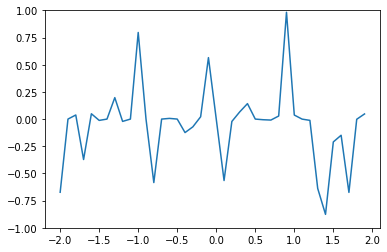

In [41]:
from numpy import math
from numpy import asarray
from numpy import exp
from numpy.random import randn
from numpy.random import rand
from numpy.random import seed
import numpy as np
import matplotlib.pyplot as plt
#Wiggly function
def wiggly(x):
    y = -math.exp(pow(x,2)/100)*pow(math.sin(13*x - pow(x,4)),5)*pow(math.sin(1-3*pow(x,2)),2)
    return y
f2 = np.vectorize(wiggly)
x = np.arange(-2, 2, 0.1)
plt.plot(x, f2(x))
plt.ylim((-1,1))
plt.show()

In [29]:
# simulated annealing function
def simulated_annealing(wiggly, bounds, n, step_size, temp):
    best = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    best_eval = wiggly(best)
    curr, curr_eval = best, best_eval
    for i in range(n):
        candidate = curr + randn(len(bounds)) * step_size
        candidate_eval = wiggly(candidate)
        if candidate_eval > best_eval:
            best, best_eval = candidate, candidate_eval
            print('>%d f(%s) = %.5f' % (i, best, best_eval))
        diff = candidate_eval - curr_eval
        t = temp / float(i + 1)
        metropolis = math.exp(-diff / t)
        if diff < 0 or rand() < metropolis:
            curr, curr_eval = candidate, candidate_eval
    return [best, best_eval]

In [30]:
seed(1)
bounds = asarray([[-2.0, 2.0]])
n = 1000
step_size = 0.1
temp = 10

>0 f([-0.41212927]) = -0.06468
>1 f([-0.45701705]) = -0.00029
>2 f([-0.56761055]) = 0.00079
>4 f([-0.55858092]) = 0.00216
>5 f([-0.63470161]) = 0.01882
>17 f([-0.63166263]) = 0.01910
>46 f([-0.11207005]) = 0.65187
>227 f([-1.00102609]) = 0.80112
>330 f([-1.00453357]) = 0.80660
f([-1.00453357]) = 0.806595
>4 f([0.37986827]) = 0.25995
>83 f([-0.08282716]) = 0.36465
>102 f([-0.10216857]) = 0.58555
>130 f([-0.11998592]) = 0.66798
f([-0.11998592]) = 0.667976
>0 f([0.57161376]) = -0.00019
>7 f([0.50762171]) = -0.00005
>13 f([-0.06677007]) = 0.18002
>17 f([-0.06773862]) = 0.18965
>21 f([-0.10429825]) = 0.60364
>154 f([-0.10626583]) = 0.61861
>261 f([-0.10770709]) = 0.62843
>498 f([-0.11409631]) = 0.65933
>501 f([-0.11703469]) = 0.66610
f([-0.11703469]) = 0.666103
>0 f([0.32060651]) = 0.18053
>1 f([0.39030905]) = 0.19967
>2 f([0.37151913]) = 0.29887
>3 f([0.35540684]) = 0.32926
>39 f([-0.10130637]) = 0.57771
>40 f([-0.11584693]) = 0.66395
>292 f([-0.11735263]) = 0.66654
f([-0.11735263]) = 0.66

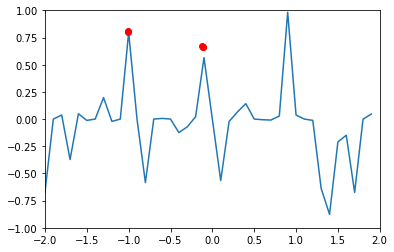

In [31]:
import numpy as np
import matplotlib.pyplot as plt
bests = np.array([])
for i in range(0,5):
    best, score = simulated_annealing(wiggly, bounds, n, step_size, temp)
    print('f(%s) = %f' % (best, score))
    bests = np.append(bests, best)

f2 = np.vectorize(wiggly)
x = np.arange(-2, 2, 0.1)
plt.plot(x, f2(x))
plt.ylim(-1,1)
plt.xlim(-2,2)
plt.plot(bests,f2(bests), linestyle=' ', marker='o', color='r', label='Plotting the Solutions')
plt.show()

In [32]:
print("optimal value:",f2(bests)[0])

optimal value: 0.8065952499803214


In [33]:
np.set_printoptions(suppress=True) #numpy array 
coin_value=np.array([1,5,10,25,50,100]) 
alpha=0.10 
coin_weight=np.exp(alpha*coin_value)
coin_obs_mean = 10.3828
coin_obs_var = 257.9547

In [34]:
print("Coint_weights:",coin_weight)
print("Observed_mean:",coin_obs_mean)
print("Observed_variance:", coin_obs_var)

Coint_weights: [    1.10517092     1.64872127     2.71828183    12.18249396
   148.4131591  22026.46579481]
Observed_mean: 10.3828
Observed_variance: 257.9547


In [35]:
def coin_weights(alpha):
    global prob_coin
    global coin_mean
    coin_obs_mean = 10.3828
    coin_value = np.array([1,5,10,25,50,100]) 
    exp_alhpa_x = np.exp(alpha*coin_value)
    prob_coin = exp_alhpa_x/sum(exp_alhpa_x)
    coin_mean = sum(coin_value * prob_coin)
    mean_diff = abs(coin_mean - coin_obs_mean)
    
    return mean_diff

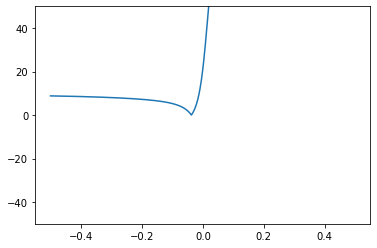

In [11]:
f2 = np.vectorize(coin_weights)
x = np.arange(-0.5, 0.5, 0.001)
plt.plot(x, f2(x))
plt.ylim((-50,50))
plt.show()

In [36]:
seed(1)
bounds = asarray([[-0.5, 0.5]])
n = 1000
step_size = 0.01
temp = 10

>0 f([-0.09099972]) = 4.94536
>1 f([-0.0954885]) = 5.12816
>2 f([-0.10654785]) = 5.51840
>3 f([-0.12309301]) = 5.98286
>4 f([-0.13326315]) = 6.21711
>24 f([-0.13715363]) = 6.29867
>48 f([-0.01576605]) = 7.77168
>98 f([-0.01308383]) = 9.44205
>110 f([-0.01249516]) = 9.83968
>186 f([-0.00652705]) = 14.58364
>325 f([0.00186991]) = 23.76150
f([0.00186991]) = 23.761504
[0.00186991]


C:\Users\sande\AppData\Local\Temp/ipykernel_28728/3270861253.py:6: RuntimeWarning: overflow encountered in exp
  exp_alhpa_x = np.exp(alpha*coin_value)
C:\Users\sande\AppData\Local\Temp/ipykernel_28728/3270861253.py:7: RuntimeWarning: invalid value encountered in true_divide
  prob_coin = exp_alhpa_x/sum(exp_alhpa_x)


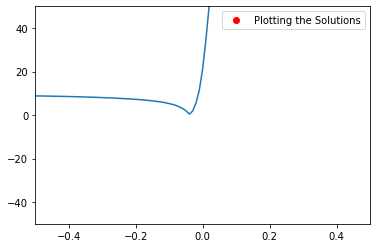

In [37]:
best, score = simulated_annealing(coin_weights, bounds, n, step_size, temp)
print('f(%s) = %f' % (best, score))
print(best)
f2 = np.vectorize(coin_weights)
x = np.arange(-0.5, 0.5, 0.01)
plt.plot(x, f2(x))
plt.ylim((-50,50))
plt.xlim(-0.5,0.5)
plt.plot(score,f2(score), linestyle=' ', marker='o', color='r', label='Plotting the Solutions')
plt.legend()

plt.show()

In [38]:
alpha = best[0]
print("Optimal alpha value is: ", alpha)

Optimal alpha value is:  0.0018699110414077194


In [44]:
print("probability of coin value:",prob_coin )
print("coin observed mean value: ",coin_obs_mean)
print("coin mean value :",coin_mean)

probability of coin value: [0.15699331 0.15817197 0.15965774 0.16419932 0.17205752 0.18892014]
coin observed mean value:  10.3828
coin mean value : 34.144303667372014


In [43]:
print("loss-value:", coin_weights(alpha))

loss-value: 23.761503667372015
